<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Data_MlbbHeroes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOCHAMMAD RADJA BROJAS - UJIAN 6**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('sample_data/mlbb_heroes.csv')
df

,hero_name,role,defense_overall,offense_overall,skill_effect_overall,difficulty_overall,movement_spd,magic_defense,mana,hp_regen,physical_atk,physical_defense,hp,attack_speed,mana_regen,win_rate,pick_rate,ban_rate,release_year
0,Terizla,fighter,7.0,8.0,6.0,6.0,255,10,430,54,129,19,2728,0.80,21.0,47.00,0.15,0.02,2019
1,Martis,fighter,6.0,8.0,5.0,5.0,260,10,0,35,128,25,2738,0.86,0.0,45.00,0.15,0.02,2018
2,Grock,tank,8.0,5.0,6.0,4.0,260,10,430,42,135,21,2819,0.81,12.0,47.69,0.14,0.02,2017
3,Carmilla,support,5.0,5.0,9.0,5.0,255,10,430,39,126,25,2528,0.91,16.0,53.76,0.08,0.02,2020
4,Irithel,marksman,5.0,5.0,8.0,7.0,260,10,438,35,118,17,2540,0.82,15.0,51.52,0.38,0.03,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Esmeralda,mage,7.0,6.0,6.0,4.0,240,10,502,36,114,21,2573,0.80,20.0,49.14,1.25,42.29,2019
99,Benedetta,assassin,5.0,6.0,7.0,7.0,260,10,460,33,128,15,2499,0.88,16.0,52.38,0.72,49.46,2020
100,Brody,marksman,6.0,9.0,4.0,7.0,253,10,435,36,140,14,2490,0.96,3.0,51.57,0.71,60.05,2020
101,Natalia,assassin,6.0,9.0,4.0,6.0,250,10,486,35,121,18,2589,0.89,15.0,47.76,0.41,61.29,2016


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hero_name             103 non-null    object 
 1   role                  103 non-null    object 
 2   defense_overall       103 non-null    float64
 3   offense_overall       103 non-null    float64
 4   skill_effect_overall  103 non-null    float64
 5   difficulty_overall    103 non-null    float64
 6   movement_spd          103 non-null    int64  
 7   magic_defense         103 non-null    int64  
 8   mana                  103 non-null    int64  
 9   hp_regen              103 non-null    int64  
 10  physical_atk          103 non-null    float64
 11  physical_defense      103 non-null    float64
 12  hp                    103 non-null    int64  
 13  attack_speed          103 non-null    float64
 14  mana_regen            103 non-null    float64
 15  win_rate              1

In [ ]:
df.isna().sum()

hero_name               0
role                    0
defense_overall         0
offense_overall         0
skill_effect_overall    0
difficulty_overall      0
movement_spd            0
magic_defense           0
mana                    0
hp_regen                0
physical_atk            0
physical_defense        0
hp                      0
attack_speed            0
mana_regen              0
win_rate                0
pick_rate               0
ban_rate                0
release_year            0
dtype: int64

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['physical_atk']])
df['physical_atk'] = scaler.transform(df[['physical_atk']])

scaler.fit(df[['win_rate']])
df['win_rate'] = scaler.transform(df[['win_rate']])

scaler.fit(df[['physical_defense']])
df['physical_defense'] = scaler.transform(df[['physical_defense']])

scaler.fit(df[['hp_regen']])
df['hp_regen'] = scaler.transform(df[['hp_regen']])


In [ ]:
df

,hero_name,role,defense_overall,offense_overall,skill_effect_overall,difficulty_overall,movement_spd,magic_defense,mana,hp_regen,physical_atk,physical_defense,hp,attack_speed,mana_regen,win_rate,pick_rate,ban_rate,release_year
0,Terizla,fighter,7.0,8.0,6.0,6.0,255,10,430,0.479452,0.744186,0.68,2728,0.80,21.0,0.174064,0.15,0.02,2019
1,Martis,fighter,6.0,8.0,5.0,5.0,260,10,0,0.219178,0.720930,0.92,2738,0.86,0.0,0.000000,0.15,0.02,2018
2,Grock,tank,8.0,5.0,6.0,4.0,260,10,430,0.315068,0.883721,0.76,2819,0.81,12.0,0.234117,0.14,0.02,2017
3,Carmilla,support,5.0,5.0,9.0,5.0,255,10,430,0.273973,0.674419,0.92,2528,0.91,16.0,0.762402,0.08,0.02,2020
4,Irithel,marksman,5.0,5.0,8.0,7.0,260,10,438,0.219178,0.488372,0.60,2540,0.82,15.0,0.567450,0.38,0.03,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Esmeralda,mage,7.0,6.0,6.0,4.0,240,10,502,0.232877,0.395349,0.76,2573,0.80,20.0,0.360313,1.25,42.29,2019
99,Benedetta,assassin,5.0,6.0,7.0,7.0,260,10,460,0.191781,0.720930,0.52,2499,0.88,16.0,0.642298,0.72,49.46,2020
100,Brody,marksman,6.0,9.0,4.0,7.0,253,10,435,0.232877,1.000000,0.48,2490,0.96,3.0,0.571802,0.71,60.05,2020
101,Natalia,assassin,6.0,9.0,4.0,6.0,250,10,486,0.219178,0.558140,0.64,2589,0.89,15.0,0.240209,0.41,61.29,2016


# Melihat kolerasi

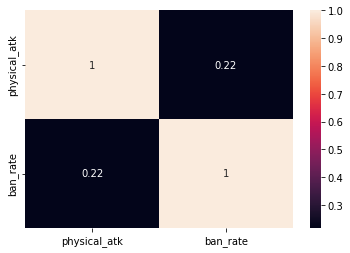

In [ ]:
sns.heatmap(df[['physical_atk', 'ban_rate']].corr(), annot=True)

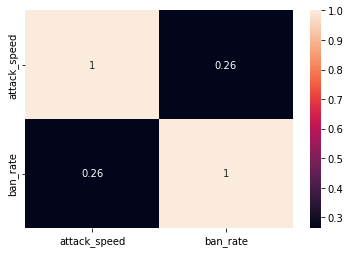

In [ ]:
sns.heatmap(df[['attack_speed', 'ban_rate']].corr(), annot=True)

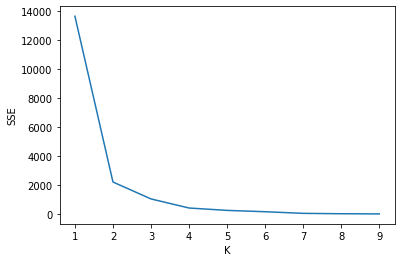

In [ ]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['physical_atk', 'ban_rate']])
  sse.append(km.inertia_) #inertia = tingkat eror, makin kecil makin bagus

sns.lineplot(x='K', y='SSE', data=pd.DataFrame({'K' : k_rng, 'SSE' : sse}))

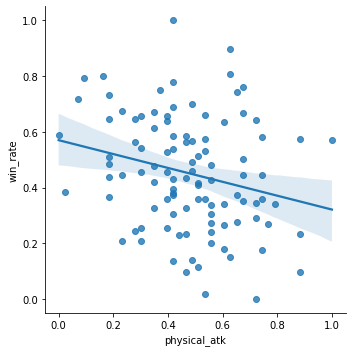

In [ ]:
sns.lmplot(x='physical_atk', y='win_rate', data=df)

In [ ]:
x = df[['physical_atk']]
y = df[['win_rate']]

In [ ]:
# Training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10)

In [ ]:
# Membuat model

from sklearn.linear_model import LinearRegression

otak = LinearRegression()
otak.fit(x_train, y_train)

LinearRegression()

In [ ]:
otak.intercept_, otak.coef_

(array([0.58475495]), array([[-0.25410483]]))

In [ ]:
otak.score(x_test, y_test)

0.012293709359113225

In [ ]:
y_predict = otak.predict(x_test)

evaluasi = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted' : y_predict.flatten()
    })

evaluasi.head(10)

,Actual,Predicted
0,0.206266,0.507933
1,0.637076,0.484295
2,0.484769,0.537480
3,0.584856,0.466567
4,0.416014,0.454748
5,0.762402,0.413382
6,0.563098,0.513842
7,0.750218,0.490204
8,0.181027,0.431110
9,0.673629,0.525661


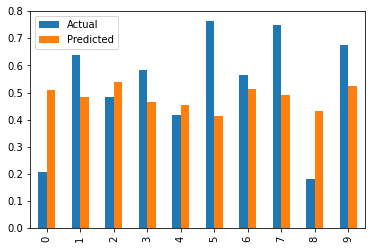

In [ ]:
evaluasi.head(10).plot(kind='bar')

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error (y_test, y_predict))

0.03914866515077359


# Gradio

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

def predict(PhysicalAtk, WinRate):
    return otak.predict([[PhysicalAtk, WinRate]])[0][0]

demo = gr.Interface(predict, 
                    [gr.Number(label="PhysicalAtk"), gr.Number(label="WinRate")], 
                    gr.Number())

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15065.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f1f42c88750>,
 'http://127.0.0.1:7862/',
 'https://15065.gradio.app')